# `Pandas`：図示

## 始める前に

次のセルの１行目以外をアンコメント（`# `を削除）しコードを実行しなさい。アンコメントするには次の手順に従う。
* Windowsの場合：１行目以外の全ての行を選択し，`Ctrl`を押したまま`/`を押す。
* Macの場合：１行目以外の全ての行を選択し，`command`を押したまま`/`を押す。

In [ ]:
# CELL PROVIDED
# import piplite
# await piplite.install('japanize-matplotlib-jlite')
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (3.5, 2.5)

次のコードを実行しなさい。

In [ ]:
import japanize_matplotlib_jlite  # プロットで日本語表示
import pandas as pd
import numpy as np

## 説明

`DataFrame`と`Series`の`.plot()`メソッドを使いプロットする方法を紹介する。

次の`df0`を使って説明する。

In [4]:
# CELL PROVIDED
dic = {'X':[10, 20, 30],
       'Y':[5.0, 30.0, 15.0],
       'Z':[3.0, 2.0, 5.0]}
df0 = pd.DataFrame(dic)
df0

,X,Y,Z
0,10,5.0,3.0
1,20,30.0,2.0
2,30,15.0,5.0


## プロット方法

メソッド`.plot()`を使うが、次の構文となる。
```
df0.plot(x="列ラベル", y="列ラベル")
```
* `x`：横軸に使う列ラベル（文字列）
* `y`：縦軸に使う列ラベル（文字列、複数の場合はリスト）

<Axes: xlabel='X'>

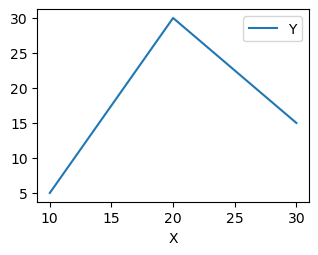

In [13]:
df0.plot(x='X', y='Y')

* 凡例は自動的に表示され、列ラベルが使われる。次の引数を追加すると凡例は非表示になる。
```
legend=False
```
* 図の上に文字が表示されるが，表示したくない場合は最後に`;`を加えるか次の行に`pass`と書くと良いだろう。

縦軸に複数の変数を表示したい場合はリストとして指定する。
```
df0.plot(x="列ラベル", y=["列ラベル１", "列ラベル２"])
```

<Axes: xlabel='X'>

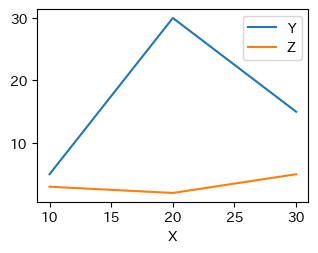

In [102]:
df0.plot(x='X', y=['Y', 'Z'])

引数`x`を省略すると、横軸に行インデックスが使われる。

<Axes: >

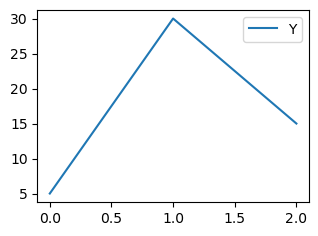

In [23]:
df0.plot(y='Y')

↑↑↑　行インデックス番号が`float`として表示されている。

２つの引数`x`と`y`を省略すると、横軸には行インデックス、縦軸には全ての列が使われる。

<Axes: >

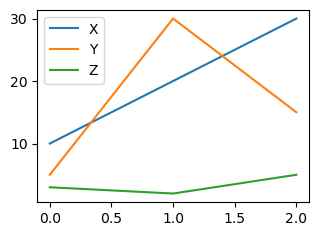

In [25]:
df0.plot()

## 引数とメソッド

### 基本的な引数

`plot()`には様々な引数があり図に「飾り付け」をすることができる。
* `title`：図のタイトル（フォントの大きさは一定）
    * 下で説明する「軸」のメソッドとして指定することもできる（フォントの大きさを指定できる）
* `style`：線のスタイル（複数ある場合はリストにして列の順番で指定する;`-`，`--`，`-.`，`:`）
* `linewidth` or `lw`：線の幅
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/3.2.2/api/markers_api.html)）
* `markersize`：マーカーの大きさ
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
    * 複数の図を表示する際は下で説明する「軸」のメソッドとして指定することもできる。
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)
    * 複数の図を表示する際は，この引数は使わずに下で説明する「軸」のメソッドとして指定する。
* `ax`：プロットする「軸」を指定する。
    * １つの「軸」に複数の図を表示する際に使う（後で使い方を説明する）。

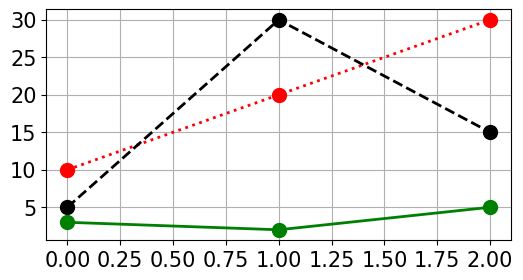

In [30]:
df0.plot(style=[':','--','-'],     # 引数 x, y は省略
         linewidth=2,
         color=['r','k','g'],
         marker='o',
         markersize=10,
         fontsize=15,
         figsize=(6, 3),   # 8は横軸、4は縦軸のサイズ
         legend=False,
         grid=True,
        )
pass

### タイトルとラベルのサイズの調整

`Pandas`（実は`Matplotlib`）が表示する図は階層的な構造となることをイメージして欲しい。ここで重要なのは「キャンバス」と「軸」の違いである。

1. 「キャンバス」とは実際に表示される**領域**であり，実際には表示されない「透明のキャンバス」である。
    * `figure`や`fig`などの変数名や引数名があれば、「キャンバス」を指していると理解すれば良いだろう。
1. 「軸」とは１つの図を表示する「キャンバス」上の**区域**である。
    * `ax`や`axes`などの変数名があれば、「軸」を表していると理解すれば良いだろう。
    * 「キャンバス」上に複数の図を表示する場合は複数の「軸」が必要となる。
    * 「軸」に図のタイトルなどを追加することになる。
    
「軸」の中にメソッド`.plot()`を使いグラフを表示することになる。

従って，概ね次のように理解して良いだろう。
* 上で説明した「基本的な引数」は上の図のピンクのエリア内での変更となる。
    * `figsize`は「キャンバス」の大きさを指定する引数だが，メソッド`plot()`は自動で「キャンバス」を作成するため`plot()`内で変更できるようになっている。
* タイトルや縦・横軸ラベルは「軸」のメソッドを使い変更する。

では実際に手順を説明する。
* `df0.plot()`は自動で「キャンバス」と「軸」を作成すると同時に「軸」を返す。それを変数（例えば，`ax`）に割り当てる。
* `ax`のメソッドを使って以下を設定する。
    * タイトル：`.set_title()`
    * 横軸ラベル：`.set_xlabel()`    
    * 縦軸ラベル：`.set_ylabel()`

実際にそれらの引数を使ってプロットしてみよう。

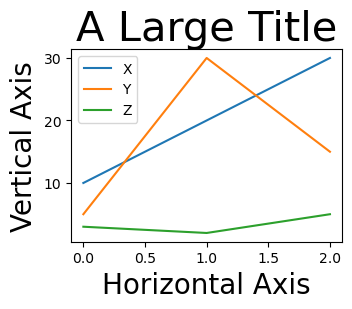

In [32]:
ax = df0.plot()                             # 引数 x, y は省略
ax.set_title('A Large Title', size= 30)     # タイトルの設定
ax.set_xlabel('Horizontal Axis', size=20)   # 横軸ラベルの設定
ax.set_ylabel('Vertical Axis', size=20)     # 縦軸ラベルの設定
pass

### 図を並べる

図を縦に並べるには`subplots=True`を指定する。

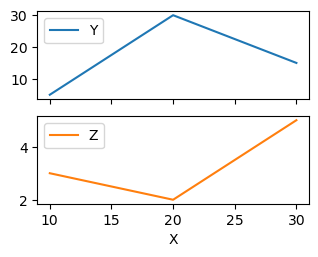

In [38]:
df0.plot(x="X", 
         y=['Y','Z'],   # 省略可
         subplots=True)
pass

図を横に並べるには`layout=(1,2)`を付け加える。`layout`は図の配置を行列のように考えて指定し、`1`は行の数であり、`2`は列の数。
```
layout(行の数、列の数)
```

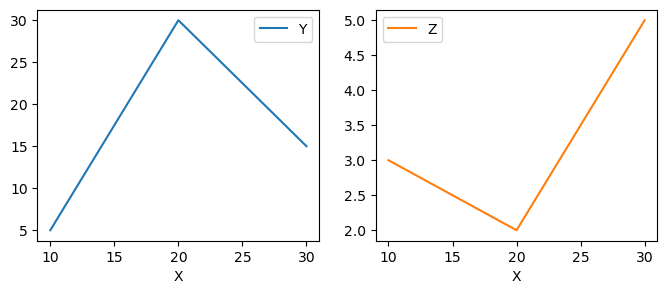

In [39]:
df0.plot(x='X',
         y=['Y','Z'],     # 省略可
         subplots=True,
         layout=(1,2),
         figsize=(8,3))
pass

## その他のプロット

### 種類

メソッド`.plot()`には様々な引数が用意されているが，その中に`kind`がある。次を文字列として指定すると様々な種類のプロットが可能となる。
* `line`：ライン・プロット
    * デフォルトの値であり，上で説明した直線・曲線のプロットとなる。
    * `.plot()`は`.plot.line()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)
* `scatter`：散布図（`DataFrame`のみ）
    * `.plot(kind='scatter')`は`.plot.scatter()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
* `hist`：ヒストグラム（連続変数に使う）
    * `hist`はHISTogramのHIST
    * `.plot(kind='hist')`は`.plot.hist()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)
* `bar`：縦向きの棒グラフ（カテゴリーなどの離散変数に使う）
    * `.plot(kind='bar')`は`.plot.bar()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

以下では散布図，ヒストグラム，縦線・横線，棒グラフについて説明する。

また横軸・縦軸ラベルの大きさは，上で説明した[タイトルとラベルのサイズの調整](sec:5-titlelabels)のコードと共通なのでそちらを参照しよう。

説明には次のコードで生成する`DataFrame`を使う。列`X`と`Y`には標準正規分布（平均`0`，標準偏差`1`）から生成した100個のランダム変数が含まれている。`Z`には正規分布（平均`2`，標準偏差`1`）から抽出した100個のランダム変数が格納されている。

In [51]:
# CELL PROVIDED
rng = np.random.default_rng()
df1 = pd.DataFrame({'X':rng.normal(size=100),
                    'Y':rng.normal(size=100),
                    'Z':rng.normal(loc=2, size=100)})

### 散布図

散布図をプロットする場合は次の構文となる。
```
df1.plot(x="列ラベル", y="列ラベル", kind='scatter')
```
* `x`：横軸に使う列ラベル（文字列）
* `y`：縦軸に使う列ラベル（文字列）

列`X`と`Y`を使ってプロットしてみよう。

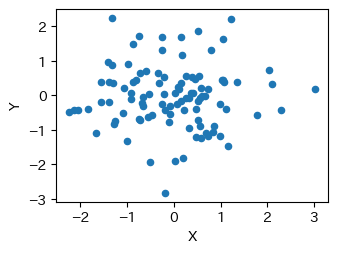

In [82]:
df1.plot(x='X', y='Y', kind='scatter')
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `title`：図のタイトル（文字列型で指定）
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/3.2.2/api/markers_api.html)）
* `s`：マーカーの大きさ（`markersize`ではない！）
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)
* `ax`：プロットする「軸」を指定する。

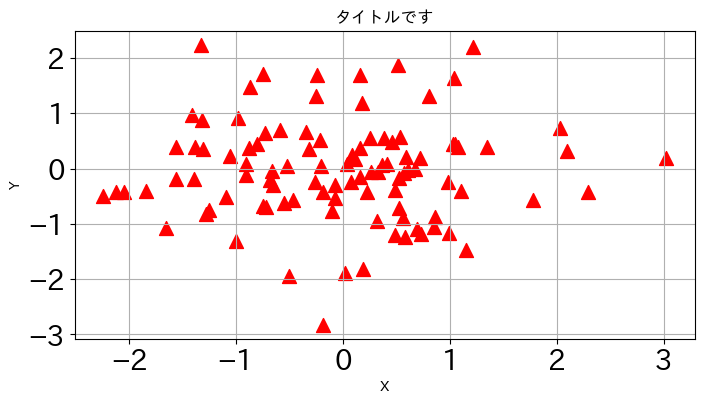

In [73]:
df1.plot(x='X', y='Y',
         kind='scatter',
         title='タイトルです',
         color='red',
         marker='^',
         s=100,
         fontsize=20,
         figsize=(8,4),
         legend=False,
         label='Y',
         grid=True
        )
pass

この図ではタイトルと横軸・縦軸ラベルの大きさが調整できていないが，上で説明した[タイトルとラベルのサイズの調整](sec:5-titlelabels)のコードと共通なので，そちらを参照しよう。

### ヒストグラム

ヒストグラムは次の構文となる。
```
df1.plot(y='列ラベル', kind='hist')
```
* `y`：縦軸に使う列ラベル（文字列、複数指定する場合はリスト）
* 横軸は自動で設定されるため`x`は指定する必要はない

プロットしてみよう。

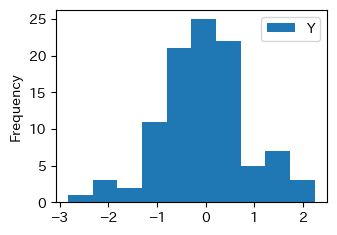

In [88]:
df1.plot(y='Y', kind='hist')
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `title`：図のタイトル（文字列型で指定）
* `bins`：柱の数
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `edgecolor`又は`ec`：柱の境界線の色
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)
* `subplots`：複数の図をプロットする（詳細はライン・プロットを参照）
* `ax`：プロットする「軸」を指定する。

引数を指定して`X`のヒストグラムをプロットしてみよう。

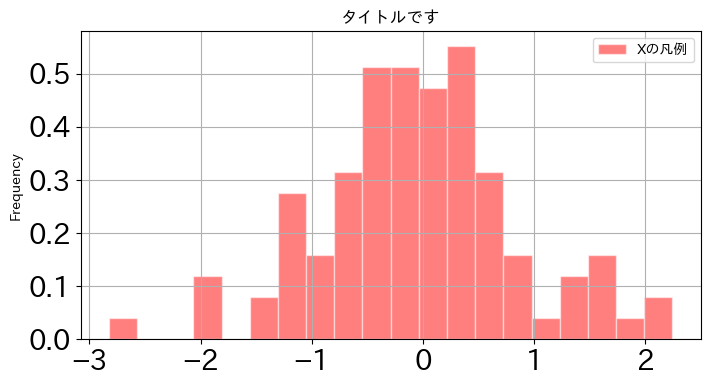

In [86]:
df1.plot(y='Y',
         kind='hist',
         bins=20,
         title='タイトルです',
         color='red',
         ec='white',
         alpha=0.5,
         density=True,
         fontsize=20,
         figsize=(8,4),
         legend=True,
         label='Xの凡例',
         grid=True
        )
pass

### 縦線・横線

図に縦線や横線を追加したい場合がある。その場合は，[タイトルとラベルのサイズの調整](sec:5-titlelabels)で説明したように「軸」に追加していく事になる。次のような書き方となる。

* 縦線の場合
    ```
    ax_.axvline(＜横軸の値＞)
    ```
    ここで`axvline`の`ax`はAXis，`v`はVertical，`line`はLINEのことを表している。
* 横線の場合
    ```
    ax_.axhline(＜縦軸の値＞)
    ```
    ここで`axhline`の`ax`はAXis，`h`はHorizontal，`line`はLINEのことを表している。

ここで`ax_`は`.plot()`で返された「軸」を割り当てた変数。

`Y`のヒストグラムを使ってプロットしてみよう。

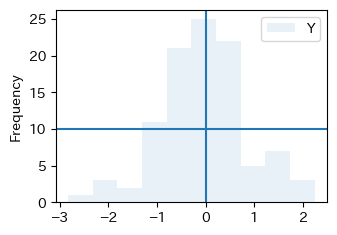

In [89]:
ax_ = df1.plot(y='Y', kind='hist', alpha=0.1)
ax_.axvline(0)
ax_.axhline(10)
pass

**＜基本的な引数＞**
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン

### 棒グラフ

まず次のコードでデータを準備しよう。

In [90]:
# CELL PROVIDED

df2 = pd.DataFrame({'country':['A','B','C'],
                    'gdp':[100,90,110],
                    'con':[50,60,55],
                    'inv':[15,10,20],
                    'gov':[10,5,30],
                    'netex':[25,15,5]})

３国のGDPとその構成要素からなる`DataFrame`である。
* `country`：国
* `gdp`：GDP
* `con`：消費
* `inv`：投資
* `gov`：政府支出
* `netex`：純輸出

この`DataFrame`を使って棒グラフの作成方法を説明するが，次の構文となる。
```
df1.plot(x="列ラベル", y="列ラベル", kind='bar')
```
* `x`：横軸に使う列ラベル（文字列）
* `y`：縦軸に使う列ラベル（文字列、複数の場合はリスト）

まずA国の`gdp`の棒グラフを表示してみよう。

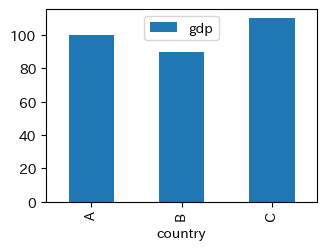

In [94]:
df2.plot(x='country', y='gdp', kind='bar')
pass

引数`y`にリストとして複数の列を指定することにより、複数のデータを同時に表示することもできる。

<Axes: xlabel='country'>

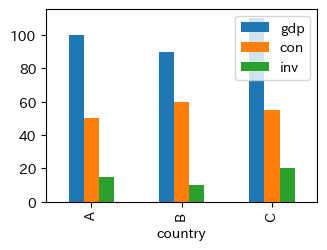

In [100]:
cols = ['gdp','con','inv']
df2.plot(x='country', y=cols, kind='bar')

また次の引数を指定すると棒を積み重ねて表示できる。

<Axes: xlabel='country'>

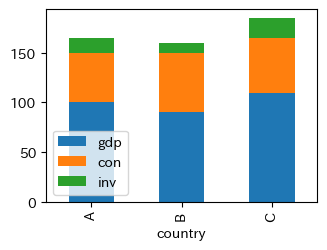

In [101]:
df2.plot(x='country', y=cols, kind='bar', stacked=True)